<a href="https://colab.research.google.com/github/dreamerel/Data-Analysis-with-Python---Coursera/blob/master/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [0]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [0]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [0]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [0]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [0]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [0]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


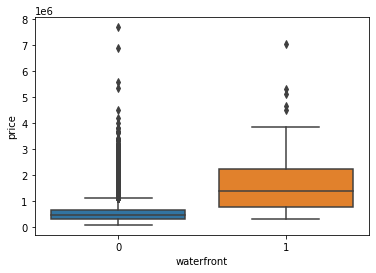

In [0]:
sns.boxplot(x='waterfront', y='price', data=df)

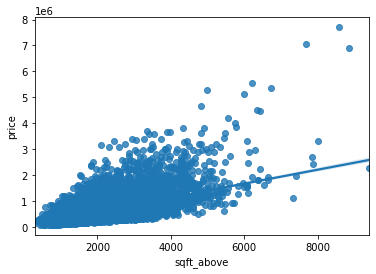

In [0]:
sns.regplot(x='sqft_above', y='price', data=df)

In [0]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [0]:
X1 = df[['sqft_living']]
Y1 = df['price']
lm = LinearRegression()
lm
lm.fit(X1,Y1)
lm.score(X1, Y1)

0.49285321790379316

In [0]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [0]:
X = df[features]
Y= df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.6576565253474225

In [0]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [0]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
pipe.fit(X,Y)


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
pipe.score(X,Y)

0.7513410480451947

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [0]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features ]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


In [0]:
from sklearn.linear_model import Ridge

In [0]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.6478759163939117

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = Ridge(alpha=0.1)
poly.fit(x_train_pr, y_train)
poly.score(x_test_pr, y_test)

0.7002744277220405